In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

balance-scale is dataset that classifies the scale to be tipped to left,right or being balanced depending on the parameters 

In [3]:
df = pd.read_csv('balance.csv')

The target attribute here is class . The data needs to be classified as either balanced(B) , tipped to left(l) , tipped to right(R).

In [4]:
df.head()

,Class,Left-weight,Ledt-distance,Right-weight,Right-distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


Let us now observe the shape of the dataframe.

In [5]:
df.shape

(625, 5)

print the column names

In [6]:
print(df.columns.values)

['Class' 'Left-weight' 'Ledt-distance' 'Right-weight' 'Right-distance']


we can see that for this particular dataset , the predictor features are 'left-weight' 'left-distance' 'right-weight' 'right-distance' as they all influence the classification of data.

In [7]:
df['Class'].value_counts()

R    288
L    288
B     49
Name: Class, dtype: int64

From here , we can see that the dataset is imbalanced.

In [8]:
#Data-point that we will classify using knn
new_data = [1,2,2,3]
print(new_data)

[1, 2, 2, 3]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class           625 non-null    object
 1   Left-weight     625 non-null    int64 
 2   Ledt-distance   625 non-null    int64 
 3   Right-weight    625 non-null    int64 
 4   Right-distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


The data needs to be preprocessed.The non-numerical features need to be encoded to numerical features using label encoder.

In [10]:
from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()
df.iloc[:,0]=labelEncoder.fit_transform(df.iloc[:,0].values)


In [11]:
df.head()

,Class,Left-weight,Ledt-distance,Right-weight,Right-distance
0,0,1,1,1,1
1,2,1,1,1,2
2,2,1,1,1,3
3,2,1,1,1,4
4,2,1,1,1,5


In [12]:
#Let's create numpy arrays for features and target
X = df.drop('Class', axis=1).values
y = df['Class'].values

In [13]:
#importing train_test_split
from sklearn.model_selection import train_test_split

It is a best practice to perform our split in such a way that out split reflects the labels in the data. In other words, we want labels to be split in train and test set as they are in the original dataset. So we use the stratify argument.

Also we create a test set of size of about 40% of the dataset.

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [15]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly 

Text(0, 0.5, 'Error Rate')

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

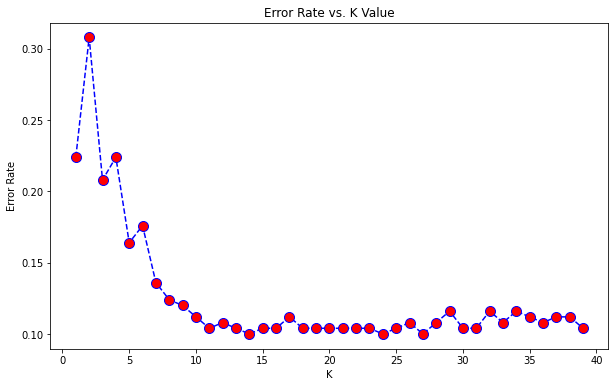

In [39]:
#elbow-method
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
 plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue' ,linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [28]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

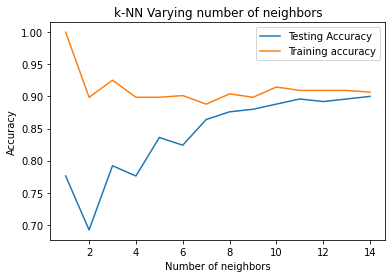

In [29]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can observe above that we get maximum testing accuracy for k=11. So lets create a KNeighborsClassifier with number of neighbors as 7.

In [30]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=11)

In [31]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [32]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.896

In [33]:
predicted1= knn.predict([new_data]) 
print ("Predicted Value:", predicted1)
if predicted1==0:
  print("Balanced Scale") 
if predicted1==1:
  print("Scale tipped to left")
if predicted1==2:
  print("Scale tipped to right")

Predicted Value: [2]
Scale tipped to right


In [34]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [35]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[  1,   8,  11],
       [  0, 113,   2],
       [  2,   3, 110]])

In [36]:
#Confusion matrix can also be obtained using crosstab method of pandas.
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,1,8,11,20
1,0,113,2,115
2,2,3,110,115
All,3,124,123,250


In [37]:
#import classification_report
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.33      0.05      0.09        20
           1       0.91      0.98      0.95       115
           2       0.89      0.96      0.92       115

    accuracy                           0.90       250
   macro avg       0.71      0.66      0.65       250
weighted avg       0.86      0.90      0.87       250



Inference:-KNN calculates distance between test data and train data and predicts the result by considering the answers of k nearest neighbours. KNN doesn't make any assumptions hence is more accurate for smaller datasets. For larger datasets the speed and efficiency decreases
